In [1]:
import numpy as np

In [15]:
def EGreedy(e,start,optimum,Nt,Bandits,ConstantStep=False,alpha=None):
    p1 = np.random.rand()
    reward = 0
    if(p1<(1-e)):
#         print(Nt)
        maxVal = -100
        index = -1
        for i in range(Bandits):
            temp = start[i]
            if(temp>maxVal):
                maxVal = temp
                index = i
#         print(optimum)
        reward = optimum[index]+np.random.randn(2)[0]
        if(ConstantStep==False):
            start[index] = (start[index]*Nt[index]+reward)/(Nt[index]+1)
        else:
            start[index] = (1-alpha)*start[index]+alpha*reward
#             print(alpha)
        Nt[index]+=1
    else:
        index = np.random.randint(Bandits)
#         print(index)
        reward = optimum[index]+np.random.randn(2)[0]
        if(ConstantStep==False):
            start[index] = (start[index]*Nt[index]+reward)/(Nt[index]+1)
        else:
            start[index] = (1-alpha)*start[index]+alpha*reward
        Nt[index]+=1
    
    return start,Nt,reward,index

In [16]:
def BestAction(Optimum):
    index = -1
    maxV = -100
    for i in range(len(Optimum)):
        temp = Optimum[i]
        if(temp>maxV):
            maxV = temp
            index = i
    return index

In [22]:
np.random.seed(0)
Bandits = 10
C=2
e=0.1
alpha = 0.1
Optimistic = 5
E_Reward = np.zeros(10001)
O_Reward = np.zeros(10001)

for j in range(2000):
    Optimum = np.zeros(Bandits)
#     print(Optimum[1])
    EqualStart = np.random.randn(2)[0]
    for i in range(Bandits):
        Optimum[i] = EqualStart
    start2 = np.random.randn(Bandits)*0.0001
    start3 = np.random.randn(Bandits)*0.0001+Optimistic
    Nt2 = np.zeros(Bandits)
    Nt3 = np.zeros(Bandits)
    Time = 0
    BestAct=0
    for i in range(10000):
        Time+=1
        start2,Nt2,CurrReward,ind = EGreedy(e,start2,Optimum,Nt2,Bandits,ConstantStep=True,alpha=alpha)
        if(ind==BestAct):
            E_Reward[Time] += 1
        
        start3,Nt3,CurrReward,ind = EGreedy(0,start3,Optimum,Nt3,Bandits,ConstantStep=True,alpha=alpha)
        if(ind==BestAct):
            O_Reward[Time] += 1
        Optimum += np.random.randn(Bandits)*0.01
        BestAct = BestAction(Optimum)
        
E_Reward/=2000
E_Reward
O_Reward/=2000
O_Reward


array([0.    , 0.1085, 0.079 , ..., 0.4855, 0.4845, 0.483 ])

(10001,)


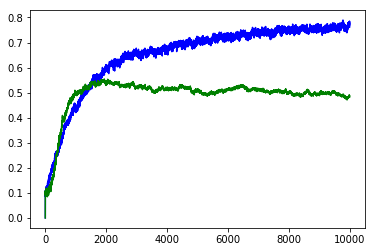

In [23]:
from matplotlib import pyplot as plt
print(np.shape(E_Reward))
arr = range(0,10001)
np.shape(arr)
plt.plot(arr,E_Reward,color='Blue')
plt.plot(arr,O_Reward,color='Green')
plt.show()